In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import IamLinesDataset

In [3]:
transform = [{"type": "ToPILImage", "args": None}, 
             #{"type": "RandomResizeCrop", "args": None}, 
             {"type": "RandomRotation", "args": {"degrees": 0.8, "fill": 0}}, 
             {"type": "ColorJitter", "args": {"brightness": 0.5, "contrast": 0.5, "saturation": 0.5, "hue": 0.5}}, 
             {"type": "ToTensor", "args": None},             
             {"type": "Normalize", "args": {"mean": [0.912], "std": 0.168}},
             #{"type": "RandomAffine", "args": {"degrees": [-0.25, 0.25], "scale": [0.98, 1.0]}}
            ]

In [4]:
target_transforms = [
    {"type": "ToLower", "args": None},
    {"type": "ToCharcters", "args": {"pad_token": "_", "eos_token": "</s>"}},
    {"type": "ToWordPieces", "args": {
        "num_features": 64, 
        "tokens": "iamdb_1kwp_tokens_1000.txt", 
        "lexicon": "iamdb_1kwp_lex_1000.txt",
        "use_words": False,
        "prepend_wordsep": False,
    }
    }
    
]

In [5]:
from text_recognizer.datasets.transforms import ToText

In [10]:
to_text = ToText(
    num_features= 64, 
    tokens="iamdb_1kwp_tokens_1000.txt", 
    lexicon="iamdb_1kwp_lex_1000.txt",
    use_words=False,
    prepend_wordsep= False,)

2021-02-24 21:43:47.687 | DEBUG    | text_recognizer.datasets.transforms:__init__:201 - Using data dir: /home/akternurra/Documents/projects/quest-for-general-artifical-intelligence/projects/text-recognizer/data/raw/iam/iamdb


In [6]:
dataset = IamLinesDataset(train=False, pad_token="_", transform=transform, target_transform=target_transforms, lower=True)
dataset.load_or_generate_data()
print(dataset)

2021-02-24 21:42:02.700 | DEBUG    | text_recognizer.datasets.transforms:__init__:201 - Using data dir: /home/akternurra/Documents/projects/quest-for-general-artifical-intelligence/projects/text-recognizer/data/raw/iam/iamdb


IAM Lines Dataset
Number classes: 54
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z', 36: ' ', 37: '!', 38: '"', 39: '#', 40: '&', 41: "'", 42: '(', 43: ')', 44: '*', 45: '+', 46: ',', 47: '-', 48: '.', 49: '/', 50: ':', 51: ';', 52: '?', 53: '_'}
Data: (1861, 28, 952)
Targets: (1861, 97)



but▁since▁starting▁salaries▁would▁depend▁on▁grade▁a
or▁b▁in▁the▁finals▁next▁may,▁and▁since▁mating
prospects▁would▁depend▁upon▁salaries,▁scholarship▁for
these▁fine▁young▁people▁was▁closely▁geared▁to
economic▁and▁biological▁ends▁which,▁essentially,
were▁really▁means.▁so,▁seeing▁them▁revolve▁in
circles,▁harry▁had▁the▁feeling▁that▁moke▁(or▁what
moke▁consciously▁or▁unconsciously▁symbolised,▁any-
way▁in▁harry's▁mind)▁had▁these▁splendid▁young
people▁by▁the▁short▁hairs,▁and▁was▁diverting▁them▁...


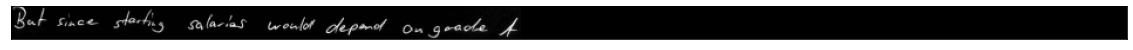

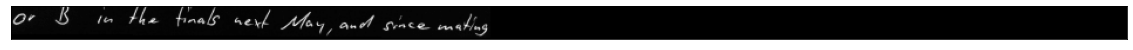

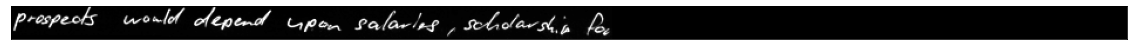

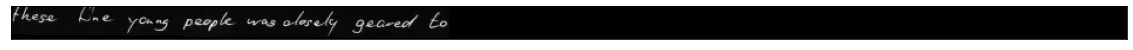

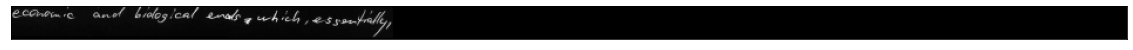

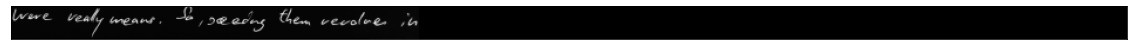

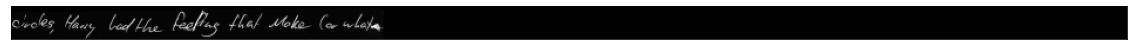

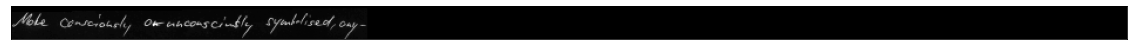

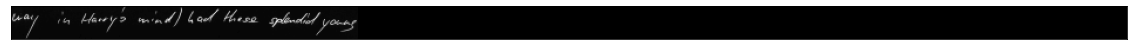

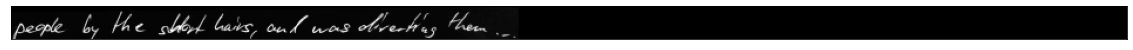

In [12]:
for i in range(190, 200):
    plt.figure(figsize=(20, 20))
    plt.xticks([])
    plt.yticks([])
    data, target = dataset[i]
#    print(target)
    print(to_text(target))
#     target = [x - 26 if x > 35 else x for x in target]
#     sentence = convert_y_label_to_string(target, dataset) 
#     print(target)
#     plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [ ]:
target.tolist()

In [ ]:
dataset.target_transform

In [ ]:
from text_recognizer.networks.transducer import load_transducer_loss, Transducer

In [ ]:
t, i =load_transducer_loss(64, 
                     0,
                     "iamdb_1kwp_tokens_1000.txt", 
                     "iamdb_1kwp_lex_1000.txt",
                     "1kwp_prune_0_0_optblank.bin",
                     "optional",
                     False,
                     False,
                     False,
                     None,
                     "mean"
                    )

In [ ]:
t(target, target)

In [ ]:
target.shape